In [2]:
import pandas as pd
import geopandas as gpd
import json
from ast import literal_eval
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read in the dataset 
df = pd.read_json('animal_news_database.json', lines = True)
df

,_id,common_name,scientific_name,distribution,iucn_status,articles,date_saved
0,{'$oid': '5eb530eeccc46a6a739577a2'},Campbell's alligator lizard,Abronia campbelli,Guatemala,Critically Endangered,{'0': {'text': 'A 3-foot-long (1 meter) green ...,2020-06-18
1,{'$oid': '5eb53116ccc46a6a739577a6'},Southern plains gray langur,Semnopithecus dussumieri,India,Least Concern,"{'3': {'text': 'On Thursday, a Nilgai was foun...",2020-06-18
2,{'$oid': '5eb53156ccc46a6a739577ab'},Natal giant cycad,Encephalartos natalensis,South Africa,Near Threatened,{'0': {'text': 'A GUIDED walk entitled Interes...,2020-06-18
3,{'$oid': '5eb53162ccc46a6a739577ad'},Bengal hanuman langur,Semnopithecus entellus,"Bangladesh, India, Nepal, Pakistan",Least Concern,{'1': {'text': 'Advertisement From the tropic...,2020-06-18
4,{'$oid': '5eb53171ccc46a6a739577af'},Mongolian Wild Ass,Equus hemionus hemionus,"China, Kazakhstan, Mongolia, Russian Federation",NA,{'0': {'text': 'Exploding demand for cashmere ...,2020-06-18
...,...,...,...,...,...,...,...
2272,{'$oid': '5ed349928089be8ca72beb86'},Chimpanzee,Pan troglodytes,"Angola, Benin, Burkina Faso, Burundi, Cameroon...",EN,{'0': {'text': 'The Chimpanzee Sanctuary & Wil...,2020-06-18
2273,{'$oid': '5ed34a668089be8ca72beb87'},Common chimpanzee,Pan troglodytes,"Angola, Benin, Burkina Faso, Burundi, Cameroon...",EN,{},2020-06-18
2274,{'$oid': '5ed352f08089be8ca72beb8a'},@TRAFFIC_WLTrade,@TRAFFIC_WLTrade,NA,NA,{'0': {'text': 'Pangolins are trafficked for t...,2020-06-18
2275,{'$oid': '5ed355ec8089be8ca72beb8b'},@IlWildTrade,@IlWildTrade,NA,NA,"{'0': {'text': 'india Updated: May 03, 2016 1...",2020-06-18


In [6]:
# How many species listed total in this dataset
df['scientific_name'].nunique()

585

In [5]:
# Drop Twitter handles as they are not species names
df = df[df.scientific_name.str.contains('@') == False]
df.reset_index(drop = True, inplace = True)

In [7]:
# Add new column for storing the values article amount found under each species type 

for i, row in df.iterrows():
    df.at[i, 'article_amt'] = len(row.articles.values())


C:\Hyapp\Miniconda3\envs\python-gis\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Hyapp\Miniconda3\envs\python-gis\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [8]:
df

,_id,common_name,scientific_name,distribution,iucn_status,articles,date_saved,article_amt
0,{'$oid': '5eb530eeccc46a6a739577a2'},Campbell's alligator lizard,Abronia campbelli,Guatemala,Critically Endangered,{'0': {'text': 'A 3-foot-long (1 meter) green ...,2020-06-18,2.0
1,{'$oid': '5eb53116ccc46a6a739577a6'},Southern plains gray langur,Semnopithecus dussumieri,India,Least Concern,"{'3': {'text': 'On Thursday, a Nilgai was foun...",2020-06-18,1.0
2,{'$oid': '5eb53156ccc46a6a739577ab'},Natal giant cycad,Encephalartos natalensis,South Africa,Near Threatened,{'0': {'text': 'A GUIDED walk entitled Interes...,2020-06-18,1.0
3,{'$oid': '5eb53162ccc46a6a739577ad'},Bengal hanuman langur,Semnopithecus entellus,"Bangladesh, India, Nepal, Pakistan",Least Concern,{'1': {'text': 'Advertisement From the tropic...,2020-06-18,1.0
4,{'$oid': '5eb53171ccc46a6a739577af'},Mongolian Wild Ass,Equus hemionus hemionus,"China, Kazakhstan, Mongolia, Russian Federation",NA,{'0': {'text': 'Exploding demand for cashmere ...,2020-06-18,5.0
...,...,...,...,...,...,...,...,...
2265,{'$oid': '5ed346f48089be8ca72beb7c'},Chiru,Pantholops hodgsonii,"China, India, Nepal",Near Threatened,{},2020-06-18,0.0
2266,{'$oid': '5ed347c88089be8ca72beb80'},Himalayan Monal,Lophophorus impejanus,"Afghanistan, Bhutan, China, India, Myanmar, Ne...",Least Concern,{},2020-06-18,0.0
2267,{'$oid': '5ed348de8089be8ca72beb85'},Chinese Monal,Lophophorus lhuysii,China,VU,{'5': {'text': 'A giant panda was captured by ...,2020-06-18,1.0
2268,{'$oid': '5ed349928089be8ca72beb86'},Chimpanzee,Pan troglodytes,"Angola, Benin, Burkina Faso, Burundi, Cameroon...",EN,{'0': {'text': 'The Chimpanzee Sanctuary & Wil...,2020-06-18,5.0


In [9]:
## Good syntax to remember to find specific instances of a value in a specific column
#df.loc[df['scientific_name'].isin(['Perameles bougainville'])]

,_id,common_name,scientific_name,distribution,iucn_status,articles,date_saved,article_amt
57,{'$oid': '5eb542acdbb5c0003a39f6e4'},Barred Bandicoot,Perameles bougainville,Australia,VU,{'1': {'text': 'Share this Article Facebook ...,2020-06-18,54.0
67,{'$oid': '5eb5442fdbb5c0003a39f703'},Long-nosed Bandicoot,Perameles bougainville,Australia,VU,"{'3': {'text': 'They aren't quite flying, but ...",2020-06-18,18.0
85,{'$oid': '5eb546fcdbb5c0003a39f737'},Mal,Perameles bougainville,Australia,VU,{'1': {'text': 'Hiya teamâ€¦.and what a cracki...,2020-06-18,7.0
95,{'$oid': '5eb54878dbb5c0003a39f746'},Marl,Perameles bougainville,Australia,VU,"{'14': {'text': 'In total, 77 samples have bee...",2020-06-18,6.0
98,{'$oid': '5eb548dedbb5c0003a39f749'},Western Barred Bandicoot,Perameles bougainville,Australia,VU,{'8': {'text': 'If you look up the Bernier and...,2020-06-18,5.0
1020,{'$oid': '5ecd3dd929e34476272be152'},Barred Bandicoot,Perameles bougainville,Australia,VU,{'12': {'text': 'Two men were arrested by Fish...,2020-06-18,11.0
1028,{'$oid': '5ecd3ede29e34476272be16c'},Long-nosed Bandicoot,Perameles bougainville,Australia,VU,{'5': {'text': 'Australia has some of the most...,2020-06-18,3.0
1044,{'$oid': '5ecd417d29e34476272be1a7'},Mal,Perameles bougainville,Australia,VU,"{'35': {'text': 'Biryani, kebabs, sheer mal, k...",2020-06-18,3.0
1057,{'$oid': '5ecd42bc29e34476272be1bb'},Marl,Perameles bougainville,Australia,VU,{'0': {'text': 'MANTUA TWP. â€” Although they ...,2020-06-18,4.0
1059,{'$oid': '5ecd42ee29e34476272be1bd'},Western Barred Bandicoot,Perameles bougainville,Australia,VU,{'11': {'text': 'More than one hundred years s...,2020-06-18,1.0


In [1]:
# Group dataframe by the scientific name that remains consistent for all rows 
grouped = df.groupby('scientific_name')

# Calculate the totals of the group species
article_totals = grouped.article_amt.sum().round()

NameError: name 'df' is not defined

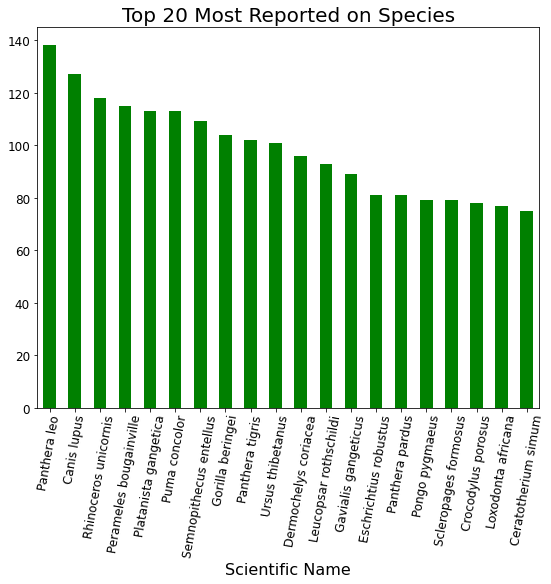

In [10]:
# What species are being reported on the most? 
# Create a simple bar graph displaying the amt of articles per species 
ax = article_totals.nlargest(20).plot.bar(color = 'green', figsize = (9,7), fontsize = 12)
ax.set_xlabel('Scientific Name', fontsize=16)
ax.set_title('Top 20 Most Reported on Species', fontsize = 20)
ax.tick_params(axis='x', rotation=80, left = True, pad = 2)
#plt.savefig('top_20_species.png', bbox_inches = 'tight')

In [9]:
(article_totals.nlargest(20).keys())

Index(['Panthera leo', 'Canis lupus', 'Rhinoceros unicornis',
       'Perameles bougainville', 'Platanista gangetica', 'Puma concolor',
       'Semnopithecus entellus', 'Gorilla beringei', 'Panthera tigris',
       'Ursus thibetanus', 'Dermochelys coriacea', 'Leucopsar rothschildi',
       'Gavialis gangeticus', 'Eschrichtius robustus', 'Panthera pardus',
       'Pongo pygmaeus', 'Scleropages formosus', 'Crocodylus porosus',
       'Loxodonta africana', 'Ceratotherium simum'],
      dtype='object', name='scientific_name')

In [11]:
# Create a new dataframe with only the top 10 (or 20) most reported on species *
top_twen = df.loc[df['scientific_name'].isin(article_totals.nlargest(20).keys())]

In [12]:
top_twen

,_id,common_name,scientific_name,distribution,iucn_status,articles,date_saved,article_amt
3,{'$oid': '5eb53162ccc46a6a739577ad'},Bengal hanuman langur,Semnopithecus entellus,"Bangladesh, India, Nepal, Pakistan",Least Concern,{'1': {'text': 'Advertisement From the tropic...,2020-06-18,1.0
18,{'$oid': '5eb533faccc46a6a739577e5'},Common Langur,Semnopithecus entellus,"Bangladesh, India, Nepal, Pakistan",Least Concern,{'1': {'text': 'GPS-locations help first time ...,2020-06-18,27.0
19,{'$oid': '5eb53408ccc46a6a739577e6'},Entellus Langur,Semnopithecus entellus,"Bangladesh, India, Nepal, Pakistan",Least Concern,{'0': {'text': 'Great zoo escapes: confessions...,2020-06-18,1.0
22,{'$oid': '5eb5359accc46a6a7395780a'},African Elephant,Loxodonta africana,"Angola, Benin, Botswana, Burkina Faso, Burundi...",Vulnerable,{'2': {'text': 'The African elephant is actual...,2020-06-18,33.0
30,{'$oid': '5eb5378bccc46a6a73957838'},African Savannah Elephant,Loxodonta africana,"Angola, Benin, Botswana, Burkina Faso, Burundi...",Vulnerable,{'10': {'text': 'Manger has been studying slee...,2020-06-18,17.0
...,...,...,...,...,...,...,...,...
2255,{'$oid': '5ed341ef8089be8ca72beb5f'},Panther,Panthera pardus,"Afghanistan, Algeria, Angola, Armenia, Azerbai...",VU,{'51': {'text': 'The Black Panther Party membe...,2020-06-18,4.0
2256,{'$oid': '5ed342db8089be8ca72beb64'},Amur Tiger,Panthera tigris,"Afghanistan, Bangladesh, Bhutan, Cambodia, Chi...",EN,"{'54': {'text': 'Scott Waller, a graduate stud...",2020-06-18,2.0
2257,{'$oid': '5ed3436f8089be8ca72beb68'},White Starling,Leucopsar rothschildi,Indonesia,CR,{'3': {'text': 'Sign up to FREE email alerts f...,2020-06-18,17.0
2258,{'$oid': '5ed343d18089be8ca72beb69'},Siberian Tiger,Panthera tigris,"Afghanistan, Bangladesh, Bhutan, Cambodia, Chi...",EN,{'85': {'text': 'LETTER | The plight of human ...,2020-06-18,1.0


In [13]:
top_twen['scientific_name'].unique()

array(['Semnopithecus entellus', 'Loxodonta africana',
       'Perameles bougainville', 'Eschrichtius robustus', 'Canis lupus',
       'Platanista gangetica', 'Gavialis gangeticus',
       'Ceratotherium simum', 'Pongo pygmaeus', 'Gorilla beringei',
       'Ursus thibetanus', 'Puma concolor', 'Crocodylus porosus',
       'Rhinoceros unicornis', 'Dermochelys coriacea',
       'Scleropages formosus', 'Panthera leo', 'Panthera pardus',
       'Panthera tigris', 'Leucopsar rothschildi'], dtype=object)

In [14]:
# create a dataframe of the articles found under each species instance 
# How to bring over the species names that have been "identified" for each article? **

top_media = pd.DataFrame()

for i in top_twen.articles:
    for x in i.values():
        nd = pd.DataFrame.from_dict(x)
        top_media = top_media.append(nd)
        
        
# keep only unique article instances
top_media = top_media.drop_duplicates(subset=['text'])

top_media

,text,title,link,image,date,ner
0,Advertisement\n\nFrom the tropics of the south...,Wild India by Axel Gomille is a real-life Jung...,https://news.google.com/articles/CBMicWh0dHBzO...,https://i.dailymail.co.uk/i/pix/2017/11/23/08/...,11/23/2017,{'sent': 'Photographer Axel Gomille spent 25 y...
0,GPS-locations help first time visitors to reac...,Trek made easy for tourists,https://news.google.com/articles/CBMiSGh0dHBzO...,https://www.deccanherald.com/sites/dh/files/ar...,05/23/2015,{'sent': 'GPS-locations help first time visito...
0,"â€œDilli ke Patrakar"" (journalist from Delhi)....",Kuno Wildlife Sanctuary: Ready for lions,https://news.google.com/articles/CBMiZWh0dHBzO...,https://www.livemint.com/rf/Image-621x414/Live...,04/22/2013,"{'sent': 'â€œDilli ke Patrakar"" (journalist fr..."
0,One of the prettiest hill stations of Himachal...,Why Visit Chail â€“ Home to The Highest Cricke...,https://news.google.com/articles/CBMibmh0dHBzO...,https://s3.india.com/wp-content/uploads/2015/0...,05/16/2019,{'sent': 'One of the prettiest hill stations o...
0,There are 400 species of mammals in India. Clo...,Book Review | Indian Mammals,https://news.google.com/articles/CBMiWGh0dHBzO...,https://images.livemint.com/rf/Image-621x414/L...,06/28/2014,{'sent': 'There are 400 species of mammals in ...
...,...,...,...,...,...,...
0,"Hey, all you cool cats and kittens! (Sorry.) N...","â€œI Saw a Tiger, and the Tiger Saw Manâ€�: 8 ...",https://news.google.com/articles/CBMiNWh0dHA6L...,https://s2982.pcdn.co/wp-content/uploads/2020/...,05/22/2020,{'sent': 'Now that weâ€™re all still indoors a...
0,Sign up to FREE email alerts from Nottinghamsh...,Grave of Notts man 'mauled' by tiger in 1915 u...,https://news.google.com/articles/CBMiU2h0dHBzO...,https://i2-prod.nottinghampost.com/incoming/ar...,05/30/2020,{'sent': 'Sign up to FREE email alerts from No...
0,A rediscovered black-and-white video clip is t...,Last-known video of 'Tasmanian tiger' rediscov...,https://news.google.com/articles/CBMiRWh0dHBzO...,https://cdn.mos.cms.futurecdn.net/tXCaynsprefT...,05/29/2020,{'sent': 'The 21-second clip shows a thylacine...
0,"india\n\nUpdated: May 27, 2020 18:56 IST\n\nAr...",Cyclone Amphan destroys one-third of worldâ€™s...,https://news.google.com/articles/CAIiEAyBmUkVJ...,https://www.hindustantimes.com/rf/image_size_9...,05/27/2020,"{'sent': 'india ', 'ents': {'GPE': ['india']}}"


In [18]:
top_media[top_media['text'].str.contains('seiz|confiscat|trade|poach')]

,text,title,link,image,date,ner
0,While one primate â€” Homo sapiens â€” has flo...,Monkey business: Building a global database of...,https://news.google.com/articles/CBMieGh0dHBzO...,https://imgs.mongabay.com/wp-content/uploads/s...,12/12/2017,{'sent': 'While one primate â€” Homo sapiens â...
0,Spread the love\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Leopard Numbers in Sanjay Gandhi National Park...,https://news.google.com/articles/CBMiV2h0dHBzO...,https://www.mangalorean.com/wp-content/uploads...,03/29/2019,{'sent': 'Spread the love L...
0,"Periyar Wildlife Sanctuary, locating in Thekka...",PERIYAR TIGER SANCTUARY â€” The Indian Panorama,https://news.google.com/articles/CBMiaWh0dHBzO...,https://www.theindianpanorama.news/wp-content/...,11/15/2015,"{'sent': 'Periyar Wildlife Sanctuary, locating..."
0,"mumbai\n\nUpdated: Feb 06, 2018 16:42 IST\n\nA...",Forests in and around Mumbai are home to 41 le...,https://news.google.com/articles/CBMiiAFodHRwc...,https://www.hindustantimes.com/rf/image_size_9...,02/06/2018,"{'sent': 'mumbai ', 'ents': {'GPE': ['mumbai']}}"
0,(CN) â€“ An international team of researchers ...,Scientists Develop Elephant DNA Database to Th...,https://news.google.com/articles/CBMiYWh0dHBzO...,https://i2.wp.com/www.courthousenews.com/wp-co...,11/01/2019,{'sent': '(CN) â€“ An international team of re...
...,...,...,...,...,...,...
0,Roads are proliferating worldwide at an unprec...,Road development in Asia: Assessing the range-...,https://news.google.com/articles/CBMiNWh0dHBzO...,https://advances.sciencemag.org/content/6/18/e...,05/01/2020,{'sent': 'We calculated the extent and potenti...
0,The video will start in 8 Cancel\n\nSign up to...,Man filmed washing horse at a car wash by amus...,https://news.google.com/articles/CAIiEH6926eJ7...,https://i2-prod.bristolpost.co.uk/incoming/art...,06/24/2019,{'sent': 'The video will start in 8 Cancel Si...
0,LETTER | The plight of human life facing the s...,"Global human life in danger, wildlife endangered!",https://news.google.com/articles/CBMiKWh0dHBzO...,https://i.ncdn.xyz/publisher-c1a3f893382d2b2f8...,05/28/2020,{'sent': 'Zoonotic diseases are not the only p...
0,FREE now and never miss the top Royal stories ...,Tiger King: Carole Baskinâ€™s â€˜end goalâ€™ i...,https://news.google.com/articles/CBMijQFodHRwc...,https://cdn.images.express.co.uk/img/dynamic/2...,05/27/2020,{'sent': 'FREE now and never miss the top Roya...


In [ ]:
## lets run a quick keyword search
# 71 articles identified out of 1887. That is 3% of the dataset for Top 20 species
# Manual classification to asses what species are mentioned, geographic locations, reporting agency, information provided, accuracy and relevancy of information in conservation research of the species 
illegaltrade_top20_articles = top20[top20['text'].str.contains('seiz|confiscat')]
# Save articles dataframe
illegaltrade_top20_articles.to_csv("illegaltrade_top20_articles.csv")

In [15]:
# Whole dataset articles
read = pd.DataFrame()

for i in df.articles:
    for x in i.values():
        nd = pd.DataFrame.from_dict(x)
        read = read.append(nd)

In [17]:
# keep only unique article instances
read = read.drop_duplicates(subset=['text'])


read.head()

,text,title,link,image,date,ner
0,A 3-foot-long (1 meter) green iguana appeared ...,Facts About Lizards,https://news.google.com/articles/CBMiM2h0dHBzO...,https://cdn.mos.cms.futurecdn.net/8DXtwFDip5e6...,09/08/2016,"{'sent': 'A 3-foot-long (1 meter)', 'ents': {'..."
0,The psychedelic rock gecko lives among the roc...,Scientists Are Debating Whether Animals Have a...,https://news.google.com/articles/CBMieGh0dHBzO...,https://video-images.vice.com/articles/5931b23...,06/05/2017,{'sent': 'Same story for the Bornean earless m...
0,"On Thursday, a Nilgai was found wandering arou...",The real wildlife of Lutyens’ Delhi,https://news.google.com/articles/CBMiYGh0dHBzO...,https://images.livemint.com/rf/Image-621x414/L...,05/27/2016,"{'sent': 'On Thursday, a Nilgai was found wand..."
0,A GUIDED walk entitled Interesting Trees of th...,Tour of Botanic Gardens trees offers up intere...,https://news.google.com/articles/CBMiXWh0dHBzO...,https://bereamail.co.za/wp-content/uploads/sit...,11/28/2019,{'sent': 'A GUIDED walk entitled Interesting T...
0,Advertisement\n\nFrom the tropics of the south...,Wild India by Axel Gomille is a real-life Jung...,https://news.google.com/articles/CBMicWh0dHBzO...,https://i.dailymail.co.uk/i/pix/2017/11/23/08/...,11/23/2017,{'sent': 'Photographer Axel Gomille spent 25 y...


In [18]:
# Transform date column into DateTime
read["date"] = pd.to_datetime(read["date"])

In [19]:
# Sort by oldest to newest
read = read.sort_values(by="date")

read.head()

,text,title,link,image,date,ner
0,"TEMPO.CO, Nairobi - The world`s last male nort...",World`s Last Male Northern White Rhino Dies,https://news.google.com/articles/CBMiSmh0dHBzO...,https://statik.tempo.co/data/2017/08/23/id_635...,1970-01-01,"{'sent': 'TEMPO.CO, Nairobi - The world`s last..."
0,"TEMPO.CO, Jakarta - Holding a huge appeal for ...",Lampung Holds Huge Appeal for International To...,https://news.google.com/articles/CBMiU2h0dHA6L...,https://statik.tempo.co/data/2015/02/01/id_366...,1970-01-01,"{'sent': 'TEMPO.CO, Jakarta - Holding a huge a..."
0,"TEMPO.CO, East Lampung - President Joko Widodo...",Jokowi Names Sumatran Rhino `Delilah`,https://news.google.com/articles/CBMiQ2h0dHBzO...,https://statik.tempo.co/data/2015/02/09/id_369...,1970-01-01,"{'sent': 'TEMPO.CO, East Lampung - President J..."
0,"TEMPO.CO, Jakarta - A Javan Leopard (Panthera ...",Javan Leopard Spotted in West Java Conservatio...,https://news.google.com/articles/CBMiVGh0dHBzO...,https://statik.tempo.co/data/2016/03/31/id_494...,1970-01-01,"{'sent': 'TEMPO.CO, Jakarta - A Javan Leopard ..."
0,"TEMPO.CO, Jakarta - Director of the Biodiversi...",Javan Rhinos to be Transferred to Cikepuh Wild...,https://news.google.com/articles/CBMiWmh0dHBzO...,https://statik.tempo.co/data/2011/12/29/id_100...,1970-01-01,"{'sent': 'TEMPO.CO, Jakarta - Director of the ..."


<AxesSubplot:xlabel='date'>

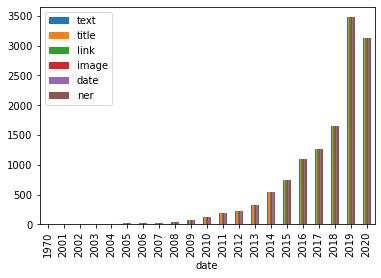

In [20]:
# Create a quick visualization of the date distribution 
read.groupby(read["date"].dt.year).count().plot(kind="bar")

In [21]:
# Read in the CITES data to join with the top 10 (or 20) most reported on species 
cites1 = pd.read_csv("cites1.csv")

In [22]:
# Keep only most relevant columns
cites1 = cites1[['Kingdom', 'Class', 'Family', 'Genus', 'Species', 'FullName', 'NativeDistributionFullNames']]

cites1 = cites1.rename(columns = {'FullName' : 'scientific_name'})

cites1

,Kingdom,Class,Family,Genus,Species,scientific_name,NativeDistributionFullNames
0,Animalia,Reptilia,Anguidae,Abronia,anzuetoi,Abronia anzuetoi,Guatemala
1,Animalia,Reptilia,Anguidae,Abronia,campbelli,Abronia campbelli,Guatemala
2,Animalia,Reptilia,Anguidae,Abronia,fimbriata,Abronia fimbriata,Guatemala
3,Animalia,Reptilia,Anguidae,Abronia,frosti,Abronia frosti,Guatemala
4,Animalia,Reptilia,Anguidae,Abronia,meledona,Abronia meledona,Guatemala
...,...,...,...,...,...,...,...
1206,Plantae,NaN,Cactaceae,Uebelmannia,NaN,Uebelmannia,NaN
1207,Plantae,NaN,Cactaceae,Uebelmannia,buiningii,Uebelmannia buiningii,Brazil
1208,Plantae,NaN,Cactaceae,Uebelmannia,gummifera,Uebelmannia gummifera,Brazil
1209,Plantae,NaN,Cactaceae,Uebelmannia,pectinifera,Uebelmannia pectinifera,Brazil


In [52]:
# Simplify the IUCN categories

df["iucn_status"].replace({"Least Concern": "LC", "Lower Risk/least concern": "LC", 
                                "Vulnerable" : "VU", "Near Threatened" : "NT", "Critically Endangered" : "CR",
                          "Extinct in the Wild" : "EW", "Endangered" : "EN", "Data Deficient" : "DD", 
                          "Extinct" : "EX"}, inplace=True)

df['iucn_status'].unique()

array(['CR', 'LC', 'NT', 'NA', 'EW', 'VU', 'EN', 'DD', 'EX',
       'Lower Risk/conservation dependent', ' Brede & Rödel'],
      dtype=object)

In [79]:
## DROP NA

df.loc[df['iucn_status'].isin(['NA'])]
#df.loc[df['scientific_name'].isin(['Perameles bougainville'])]

,_id,common_name,scientific_name,distribution,iucn_status,articles,date_saved,article_amt,Kingdom,Class,Family,Genus,Species,NativeDistributionFullNames
16,{'$oid': '5eb53171ccc46a6a739577af'},Mongolian Wild Ass,Equus hemionus hemionus,"China, Kazakhstan, Mongolia, Russian Federation",NA,{'0': {'text': 'Exploding demand for cashmere ...,2020-06-18,5.0,Animalia,Mammalia,Equidae,Equus,hemionus,"China, Kazakhstan, Mongolia, Russian Federation"
17,{'$oid': '5ecd359129e34476272be097'},Dziggetai,Equus hemionus hemionus,"China, Kazakhstan, Mongolia, Russian Federation",NA,{},2020-06-18,0.0,Animalia,Mammalia,Equidae,Equus,hemionus,"China, Kazakhstan, Mongolia, Russian Federation"
18,{'$oid': '5ecd361529e34476272be0a4'},Mongolian Wild Ass,Equus hemionus hemionus,"China, Kazakhstan, Mongolia, Russian Federation",NA,{},2020-06-18,0.0,Animalia,Mammalia,Equidae,Equus,hemionus,"China, Kazakhstan, Mongolia, Russian Federation"
43,{'$oid': '5eb533e0ccc46a6a739577e3'},Indian Wild Ass,Equus hemionus khur,"India, Iran (Islamic Republic of), Pakistan",NA,"{'3': {'text': 'It is not the destination, but...",2020-06-18,32.0,Animalia,Mammalia,Equidae,Equus,hemionus,"India, Pakistan"
44,{'$oid': '5eb53809ccc46a6a73957842'},Khur,Equus hemionus khur,"India, Iran (Islamic Republic of), Pakistan",NA,{'10': {'text': 'GILGIT: Thousands of Buddhist...,2020-06-18,5.0,Animalia,Mammalia,Equidae,Equus,hemionus,"India, Pakistan"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153,{'$oid': '5ecda6a129e34476272be7ef'},Hoolock Gibbon,Bunopithecus hoolock,"Bangladesh, China, India, Myanmar",NA,{'5': {'text': 'Among the 100 or so mammals th...,2020-06-18,4.0,Animalia,Mammalia,Hylobatidae,Bunopithecus,hoolock,"Bangladesh, China, India, Myanmar"
2154,{'$oid': '5ed340568089be8ca72beb3e'},Hoolock Gibbon,Bunopithecus hoolock,"Bangladesh, China, India, Myanmar",NA,"{'58': {'text': '""We can’t buy oxygen with mon...",2020-06-18,1.0,Animalia,Mammalia,Hylobatidae,Bunopithecus,hoolock,"Bangladesh, China, India, Myanmar"
2255,{'$oid': '5ecd6f4329e34476272be485'},Cuban Sandhill Crane,Grus canadensis nesiotes,Cuba,NA,{},2020-06-18,0.0,Animalia,Aves,Gruidae,Grus,canadensis,Cuba
2259,{'$oid': '5ecd85d829e34476272be604'},Coxen's Double-eyed Fig-Parrot,Cyclopsitta diophthalma coxeni,Australia,NA,{},2020-06-18,0.0,Animalia,Aves,Psittacidae,Cyclopsitta,diophthalma,Australia


In [51]:
# Assigning each category a more relevant color
cmap = {'CR': 'red', 'EN': 'orange', 'VU': 'yellow', 'NT': 'green', 'LC': 'blue'}

In [49]:
#colors = ['#2059BA','#FAE666','#A90A0A','#F9820B', '#128A16']

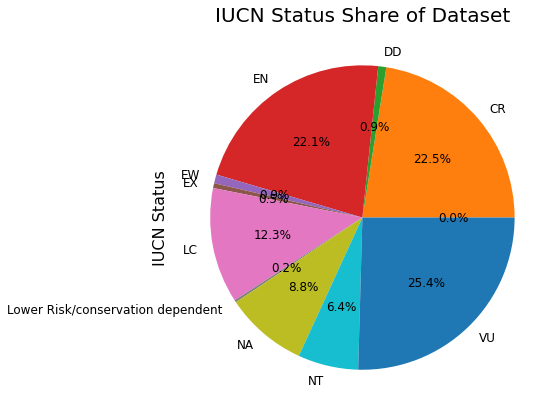

In [80]:
# Group dataframe by the scientific name that remains consistent for all rows 
grouped_i = df.groupby('iucn_status')

# Calculate the totals of the group species
article_totals_i = grouped_i.article_amt.sum().round()


# What species are being reported on the most? 
# Create a simple bar graph displaying the amt of articles per species 
ax = article_totals_i.plot.pie(autopct="%1.1f%%", figsize = (7,7), 
                                                fontsize = 12)
ax.set_ylabel('IUCN Status', fontsize=16)
ax.set_title('IUCN Status Share of Dataset', fontsize = 20)
plt.savefig('IUCN-share.png', bbox_inches = 'tight')

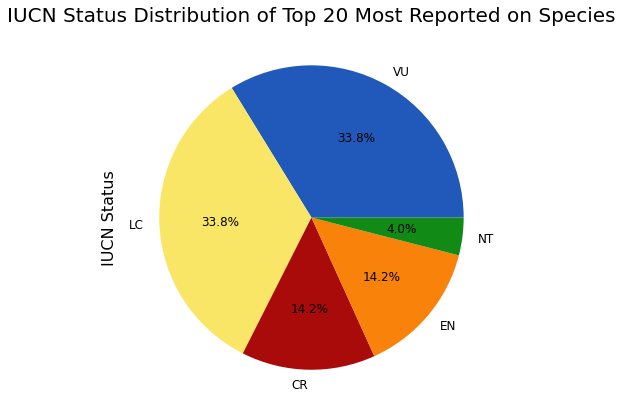

In [27]:
# Defining parameters for pie chart of IUCN Status
ax = top_twen['iucn_status'].value_counts().plot(kind = 'pie', autopct="%1.1f%%", figsize = (7,7), 
                                                fontsize = 12, colors = colors)

ax.set_ylabel('IUCN Status', fontsize=16)
ax.set_title('IUCN Status Distribution of Top 20 Most Reported on Species', fontsize = 20)
plt.savefig('IUCN-status.png', bbox_inches = 'tight')

In [32]:
# A quick look at the species' distribution
g = top_twen['article_amt'].groupby(top_twen['scientific_name'])



In [90]:
# Create a simplified version of the dataframe
smplfd = top_twen[['scientific_name', 'distribution', 'iucn_status']]

In [91]:
smplfd.drop_duplicates(inplace = True)

<ipython-input-91-2f0aab81623d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smplfd.drop_duplicates(inplace = True)


In [92]:
smplfd.reset_index(drop = True, inplace = True)
smplfd

,scientific_name,distribution,iucn_status
0,Semnopithecus entellus,"Bangladesh, India, Nepal, Pakistan",LC
1,Loxodonta africana,"Angola, Benin, Botswana, Burkina Faso, Burundi...",VU
2,Perameles bougainville,Australia,VU
3,Eschrichtius robustus,"Canada, China, Democratic People's Republic of...",LC
4,Canis lupus,"Afghanistan, Albania, Armenia, Austria, Azerba...",LC
5,Platanista gangetica,"Bangladesh, India, Nepal",EN
6,Gavialis gangeticus,"Bangladesh, Bhutan, India, Myanmar, Nepal, Pak...",CR
7,Ceratotherium simum,"Angola, Botswana, Central African Republic, Ch...",NT
8,Pongo pygmaeus,"Brunei Darussalam, Indonesia, Malaysia",CR
9,Gorilla beringei,"Democratic Republic of the Congo, Rwanda, Uganda",CR


In [93]:
# Conduct merges of the dataframes
smplfd.merge(cites1, on = 'scientific_name', how = 'inner')

,scientific_name,distribution,iucn_status,Kingdom,Class,Family,Genus,Species,NativeDistributionFullNames
0,Semnopithecus entellus,"Bangladesh, India, Nepal, Pakistan",LC,Animalia,Mammalia,Cercopithecidae,Semnopithecus,entellus,"Bangladesh, India, Nepal, Pakistan"
1,Loxodonta africana,"Angola, Benin, Botswana, Burkina Faso, Burundi...",VU,Animalia,Mammalia,Elephantidae,Loxodonta,africana,"Angola, Benin, Botswana, Burkina Faso, Cameroo..."
2,Perameles bougainville,Australia,VU,Animalia,Mammalia,Peramelidae,Perameles,bougainville,Australia
3,Eschrichtius robustus,"Canada, China, Democratic People's Republic of...",LC,Animalia,Mammalia,Eschrichtiidae,Eschrichtius,robustus,"Canada, China, Democratic People's Republic of..."
4,Canis lupus,"Afghanistan, Albania, Armenia, Austria, Azerba...",LC,Animalia,Mammalia,Canidae,Canis,lupus,"Afghanistan, Albania, Armenia, Azerbaijan, Bel..."
5,Platanista gangetica,"Bangladesh, India, Nepal",EN,Animalia,Mammalia,Platanistidae,Platanista,gangetica,"Bangladesh, India, Nepal"
6,Gavialis gangeticus,"Bangladesh, Bhutan, India, Myanmar, Nepal, Pak...",CR,Animalia,Reptilia,Gavialidae,Gavialis,gangeticus,"Bangladesh, India, Nepal, Pakistan"
7,Ceratotherium simum,"Angola, Botswana, Central African Republic, Ch...",NT,Animalia,Mammalia,Rhinocerotidae,Ceratotherium,simum,"Democratic Republic of the Congo, South Africa..."
8,Pongo pygmaeus,"Brunei Darussalam, Indonesia, Malaysia",CR,Animalia,Mammalia,Hominidae,Pongo,pygmaeus,"Indonesia, Malaysia"
9,Gorilla beringei,"Democratic Republic of the Congo, Rwanda, Uganda",CR,Animalia,Mammalia,Hominidae,Gorilla,beringei,"Democratic Republic of the Congo, Rwanda, Uganda"


In [35]:
df = df.merge(cites1, on = 'scientific_name', how = 'inner')

In [36]:
df

,_id,common_name,scientific_name,distribution,iucn_status,articles,date_saved,article_amt,Kingdom,Class,Family,Genus,Species,NativeDistributionFullNames
0,{'$oid': '5eb530eeccc46a6a739577a2'},Campbell's alligator lizard,Abronia campbelli,Guatemala,Critically Endangered,{'0': {'text': 'A 3-foot-long (1 meter) green ...,2020-06-18,2.0,Animalia,Reptilia,Anguidae,Abronia,campbelli,Guatemala
1,{'$oid': '5eb53116ccc46a6a739577a6'},Southern plains gray langur,Semnopithecus dussumieri,India,Least Concern,"{'3': {'text': 'On Thursday, a Nilgai was foun...",2020-06-18,1.0,Animalia,Mammalia,Cercopithecidae,Semnopithecus,dussumieri,India
2,{'$oid': '5eb53156ccc46a6a739577ab'},Natal giant cycad,Encephalartos natalensis,South Africa,Near Threatened,{'0': {'text': 'A GUIDED walk entitled Interes...,2020-06-18,1.0,Plantae,NaN,Zamiaceae,Encephalartos,natalensis,South Africa
3,{'$oid': '5eb53162ccc46a6a739577ad'},Bengal hanuman langur,Semnopithecus entellus,"Bangladesh, India, Nepal, Pakistan",Least Concern,{'1': {'text': 'Advertisement From the tropic...,2020-06-18,1.0,Animalia,Mammalia,Cercopithecidae,Semnopithecus,entellus,"Bangladesh, India, Nepal, Pakistan"
4,{'$oid': '5eb533faccc46a6a739577e5'},Common Langur,Semnopithecus entellus,"Bangladesh, India, Nepal, Pakistan",Least Concern,{'1': {'text': 'GPS-locations help first time ...,2020-06-18,27.0,Animalia,Mammalia,Cercopithecidae,Semnopithecus,entellus,"Bangladesh, India, Nepal, Pakistan"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,{'$oid': '5ecd99e529e34476272be75b'},San Esteban Island Chuckwalla,Sauromalus varius,Mexico,Vulnerable,{},2020-06-18,0.0,Animalia,Reptilia,Iguanidae,Sauromalus,varius,Mexico
2266,{'$oid': '5ecd9cef29e34476272be786'},Northern Muriqui,Brachyteles hypoxanthus,Brazil,CR,{},2020-06-18,0.0,Animalia,Mammalia,Atelidae,Brachyteles,hypoxanthus,Brazil
2267,{'$oid': '5ecdaeb929e34476272be830'},Huillin,Lontra provocax,"Argentina, Chile",EN,{},2020-06-18,0.0,Animalia,Mammalia,Mustelidae,Lontra,provocax,"Argentina, Chile"
2268,{'$oid': '5ed2e78f8089be8ca72be50e'},Disc Cactus,Strombocactus disciformis,Mexico,VU,{},2020-06-18,0.0,Plantae,NaN,Cactaceae,Strombocactus,disciformis,Mexico


In [42]:
# Group dataframe by the Kingdom that remains consistent for all rows 
grouped_k = df.groupby('Kingdom')

# Calculate the totals of the group Kingdom
article_totals_k = grouped_k.article_amt.sum().round()

In [43]:
article_totals_k

Kingdom
Animalia    13390.0
Plantae       175.0
Name: article_amt, dtype: float64

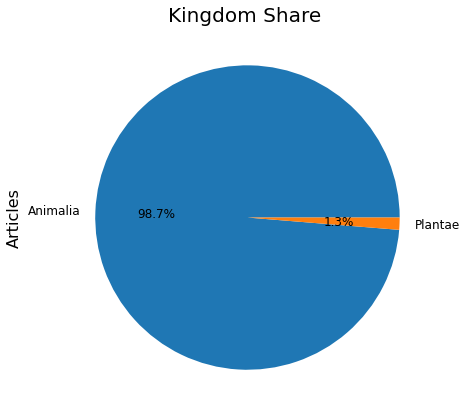

In [59]:
# What Kingdom is being reported on the most? 
# Create a simple pie chart displaying the amt of articles per Kingdom
ax = article_totals_k.plot.pie(y = 'Kingdom', autopct="%1.1f%%", figsize = (7,7), fontsize = 12)
ax.set_ylabel('Articles', labelpad = 35, fontsize=16)
ax.set_title('Kingdom Share ', fontsize = 20)
plt.savefig('Kingdom-Share.png', bbox_inches = 'tight')


In [73]:
df['Class'].value_counts()

Mammalia          1220
Aves               498
Reptilia           338
Actinopteri         46
Amphibia            30
Elasmobranchii      24
Bivalvia            24
Coelacanthi          9
Insecta              8
Name: Class, dtype: int64

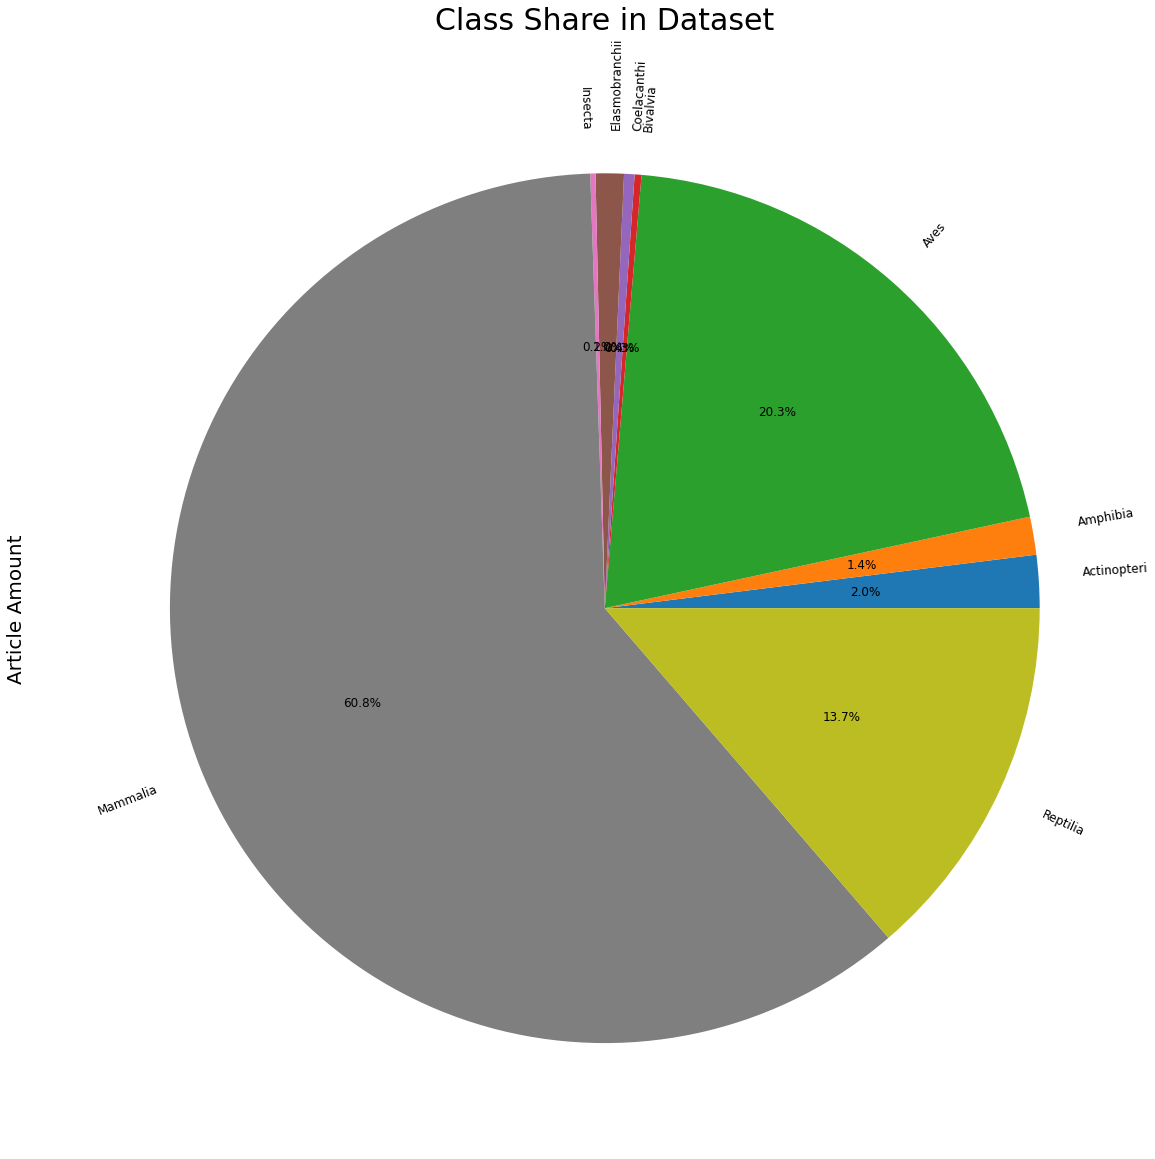

In [70]:
# Group dataframe by the Class that remains consistent for all rows 
grouped_c = df.groupby('Class')

# Calculate the totals of the Classes
article_totals_c = grouped_c.article_amt.sum().round()


# What Class is being reported on the most? 
# Create a simple pie graph displaying the amt of articles per species 
ax = article_totals_c.plot.pie(figsize = (20,20), autopct="%1.1f%%", fontsize = 12, rotatelabels=True)

ax.set_ylabel('Article Amount', labelpad = 35, fontsize=20)
ax.set_title('Class Share in Dataset', pad = 35, fontsize = 30)
plt.savefig('class-share.png', bbox_inches = 'tight')

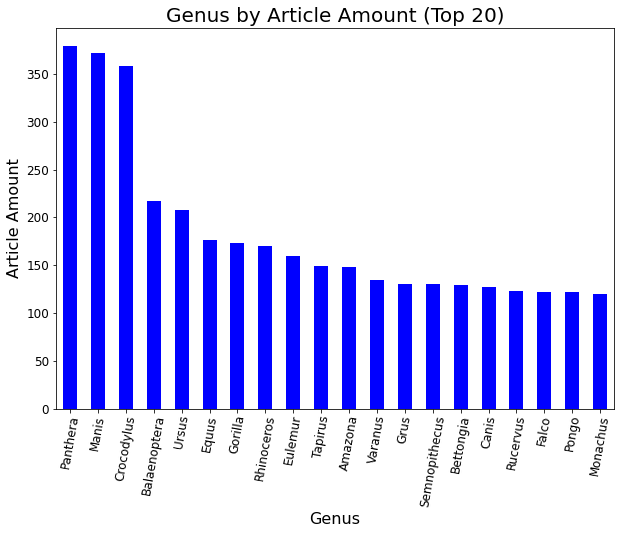

In [78]:
# Group dataframe by the scientific name that remains consistent for all rows 
grouped_G = df.groupby('Genus')

# Calculate the totals of the group species
article_totals_G = grouped_G.article_amt.sum().round()


# What species are being reported on the most? 
# Create a simple bar graph displaying the amt of articles per species 
ax = article_totals_G.nlargest(20).plot.bar(color = 'blue', figsize = (10,7), fontsize = 12)
ax.set_xlabel('Genus', fontsize=16)
ax.set_ylabel('Article Amount', fontsize = 16)
ax.set_title('Genus by Article Amount (Top 20)', fontsize = 20)
ax.tick_params(axis='x', rotation=80, left = True, pad = 2)
plt.savefig('top_20_genus.png', bbox_inches = 'tight')

13/04/22

Next visualization step:
- Don't just visualize the dataset, look at the corresponding articles published for that class! for that genus! SO need to do groupby functions 